In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from pyESN import ESN 

import RSI2 as rsi
import CPM2 as cpm
import importlib
import MovingAverage2 as ma
import ROC2 as roc

In [2]:
name = 'JNJ' 
ticker = yf.Ticker(name)
ori_df = ticker.history(start='2015-07-22', end='2025-07-22', interval='1d', auto_adjust=False)

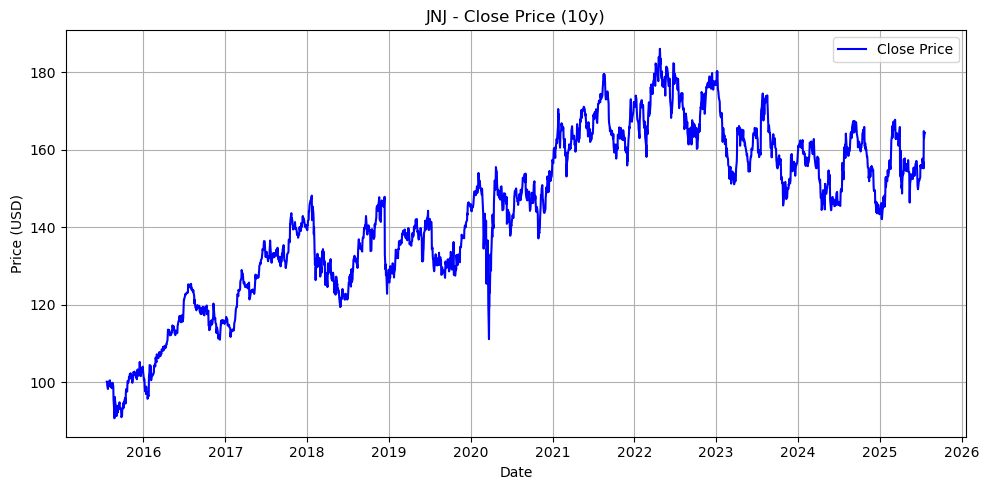

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(ori_df.index, ori_df['Close'], label='Close Price', color='blue')
plt.title(f'{name} - Close Price (10y)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
df = ori_df.copy()

In [5]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)
if df.index.tz is not None:
    df.index = df.index.tz_localize(None)
df.index = df.index.normalize()

In [6]:
import CV_ESN7
from CV_ESN7 import esn_rolling_forward

best_params_cv, all_returns_cv = esn_rolling_forward(
    df=df, 
    n_splits=5,
    pop_size=30, 
    num_generations=30
)

C:\Users\jpran\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

--- [워밍업 설정 완료] ---
    최대 룩백 기간(Global Max Lookback) : 155일
    (MA: 150, RSI: 30, ROC: 100)
--------------------------
--- 전체 데이터에 대해 CPM 정답지 생성 중 (P=0.05, T=5) ---
--- 3-Way 분할 설정 ---
초기 Train 크기: 755, Validation 크기: 502, Test 크기: 251
총 5개 폴드 생성
----------------------

--- 롤링 포워드 교차 검증 (T/V/T 분리) 시작 ---

--- 폴드 1 / 5 ---
Train: 2015-07-22 00:00:00 ~ 2018-07-19 00:00:00 (755일)
Valid: 2018-07-20 00:00:00 ~ 2020-07-17 00:00:00 (502일)
Test:  2020-07-20 00:00:00 ~ 2021-07-16 00:00:00 (251일)
[1/5] 1단계: 기술적 지표 파라미터 최적화 (Train/Valid 신호 생성)...
    [워밍업] Valid 신호용 데이터 생성 (Train 155일 + Valid 502일)
    [워밍업] Test 신호용 데이터 생성 (Valid 155일 + Test 251일)
     - 이동평균(MA) 파라미터 최적화 (순수 Train 데이터 사용)...
--- MA 8-Params 벡터화 GA 최적화 시작 (순차 처리) ---
gen	nevals	avg    	min   	max   
0  	50    	480.397	398.22	488.67
1  	43    	470.581	398.22	504.2 
2  	42    	466.92 	402.17	500.45
3  	40    	454.737	402.17	487.3 
4  	40    	437.825	384.72	476.36
5  	34    	418.561	379.15	487.3 
6  	40    	409.674	379.15	459   


Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


최종 백테스팅 결과 (최적화된 파라미터):
Start                     2020-07-20 00:00:00
End                       2021-07-16 00:00:00
Duration                    361 days 00:00:00
Exposure Time [%]                    61.35458
Equity Final [$]                   9821.82812
Equity Peak [$]                       10000.0
Commissions [$]                     330.34182
Return [%]                           -1.78172
Buy & Hold Return [%]                12.36631
Return (Ann.) [%]                    -1.78875
Volatility (Ann.) [%]                 7.46235
CAGR [%]                             -1.24712
Sharpe Ratio                          -0.2397
Sortino Ratio                        -0.31433
Calmar Ratio                         -0.21939
Alpha [%]                            -5.69601
Beta                                  0.31653
Max. Drawdown [%]                    -8.15325
Avg. Drawdown [%]                    -8.15325
Max. Drawdown Duration      360 days 00:00:00
Avg. Drawdown Duration      360 days 00:00:00
# Trades 

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


최종 백테스팅 결과 (최적화된 파라미터):
Start                     2021-07-19 00:00:00
End                       2022-07-15 00:00:00
Duration                    361 days 00:00:00
Exposure Time [%]                    49.40239
Equity Final [$]                   9981.44454
Equity Peak [$]                   10186.79657
Commissions [$]                       12.8554
Return [%]                           -0.18555
Buy & Hold Return [%]                 6.80129
Return (Ann.) [%]                    -0.18629
Volatility (Ann.) [%]                 3.07284
CAGR [%]                             -0.12956
Sharpe Ratio                         -0.06063
Sortino Ratio                        -0.08322
Calmar Ratio                         -0.04243
Alpha [%]                            -0.92286
Beta                                  0.10841
Max. Drawdown [%]                    -4.39059
Avg. Drawdown [%]                    -1.18763
Max. Drawdown Duration      332 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades 

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


최종 백테스팅 결과 (최적화된 파라미터):
Start                     2022-07-18 00:00:00
End                       2023-07-17 00:00:00
Duration                    364 days 00:00:00
Exposure Time [%]                    45.81673
Equity Final [$]                   9551.98592
Equity Peak [$]                   10055.37435
Commissions [$]                       12.0204
Return [%]                           -4.48014
Buy & Hold Return [%]                -8.70114
Return (Ann.) [%]                    -4.49758
Volatility (Ann.) [%]                 3.12418
CAGR [%]                             -3.12344
Sharpe Ratio                          -1.4396
Sortino Ratio                        -1.76807
Calmar Ratio                         -0.86044
Alpha [%]                            -3.18123
Beta                                  0.14928
Max. Drawdown [%]                    -5.22705
Avg. Drawdown [%]                     -1.6237
Max. Drawdown Duration      192 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades 

KeyboardInterrupt: 